In [1]:
import warnings 
import utils as ut 
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

from haversine import haversine
from collections import Counter

warnings.filterwarnings(action='ignore') 

In [2]:
checkin = pd.read_json('./data/yelp_academic_dataset_checkin.json', lines=True)
business = pd.read_json('./data/yelp_academic_dataset_business.json', lines=True)

# Q1. 2019년 온타리오 주(state = ON)에서 별점이 3.0 이상인 레스토랑 중 체크인이 가장 많은 top 10의 레스토랑명을 내림차순으로 나열하세요.

# Answer
---
온타리오 주에서 별점이 3.0 이상인 레스토랑은 없습니다.

레스토랑이 아닌 Bernie Hipos Wedding Films라는 Event Planning & Service 가게가 있으나, 해당 가게의 체크인 결과가 없습니다.

따라서 해당 문제의 결과를 출력할 수 없습니다.

---

- 온타리오 주에서 별점 3.0 이상인 곳


In [3]:
state_on = business.query("state == 'ON' and stars >= 3")[['business_id', 'name', 'state', 'stars', 'categories']]
state_on

,business_id,name,state,stars,categories
52167,9fJ7gK8SaNvoe0AP_JXZiw,Bernie Hipos Wedding Films,ON,5.0,"Event Planning & Services, Videographers, Prof..."


- 해당 가게의 체크인 데이터가 없음

In [4]:
state_on.merge(checkin, how='left')

,business_id,name,state,stars,categories,date
0,9fJ7gK8SaNvoe0AP_JXZiw,Bernie Hipos Wedding Films,ON,5.0,"Event Planning & Services, Videographers, Prof...",NaN


- Q1의 결과를 출력하는 함수 생성

In [5]:
def get_year(df, year):
    return df.date.count(year)

def q1_fn(year, state, stars, category, top_n=10):
    filter_category = business[business['categories'].str.contains(f'{category}', na=False, case=False)]
    filter_business = filter_category.query(f"state == '{state}' and stars >= {stars}")[['business_id', 'name', 'state', 'city', 'stars', 'categories']]

    year_count = checkin.apply(get_year, year=f'{year}', axis=1)

    checkin_year = pd.concat([checkin['business_id'], year_count], axis=1).rename(columns={0: 'checkin'})

    business_checkin = filter_business.merge(checkin_year)
    output = business_checkin.sort_values(['checkin', 'stars'], ascending=False, ignore_index=True).head(top_n)

    return output

- 타 지역(state=MA)의 경우 아래와 같은 결과를 출력할 수 있음

In [6]:
year = 2019
state = 'MA'
stars = 3 
category = 'Restaurants'

q1_fn(year, state, stars, category)

,business_id,name,state,city,stars,categories,checkin
0,aVCqrBqMqZaapyVrVNnZJQ,Beard Papa's,MA,Boston,4.0,"Restaurants, Japanese, Bakeries, Food, Desserts",1127
1,PrsvO1rzkgg6qFizlAoEtg,Mike's Pastry,MA,Boston,4.0,"Candy Stores, Gelato, Food, Coffee & Tea, Rest...",951
2,xlOMKjE4omTgkI1eduWj8A,The Friendly Toast,MA,Back Bay,4.0,"Nightlife, Diners, Bars, Breakfast & Brunch, R...",821
3,_LUnyOwSpo8N5783rceT5Q,Taiyaki NYC - Boston,MA,Boston,4.0,"Ice Cream & Frozen Yogurt, Restaurants, Food, ...",758
4,1qwxzGRcU1y3tJrsoYQ4Rw,Picco Pizza & Ice Cream,MA,Boston,4.0,"Restaurants, Bars, Nightlife, Pizza, Italian, ...",645
5,y2w6rFaO0XEiG5mFfOsiFA,Neptune Oyster,MA,Boston,4.5,"Arabian, Thai, American (Traditional), Live/Ra...",643
6,Q2dq9Eo1NMbD1k25Xx21TQ,Spring Shabu-Shabu,MA,Boston,4.5,"Restaurants, Buffets, Japanese, Hot Pot, Seafood",537
7,mNjI-BGs-FMaZCdwgP_8uA,Santouka Harvard Square,MA,Cambridge,4.0,"Soup, Ramen, Japanese, Noodles, Restaurants",510
8,nijacBMGySzM0sBsYYxUhQ,Punjabi Dhaba,MA,Cambridge,4.0,"Pakistani, Restaurants, Indian, Caterers, Even...",471
9,kP1b-7BO_VhWk_0tvuA_tw,Carmelina's,MA,Boston,4.5,"Vegetarian, Restaurants, Gluten-Free, Italian",469


- 다른 조건 예시

In [7]:
year = 2020
state = 'OR'
stars = 4 
category = 'korean'
q1_fn(year, state, stars, category)

,business_id,name,state,city,stars,categories,checkin
0,Ur7o-5FviIC9YmJqsGKR6A,Soro Soro Coffee & Dessert,OR,Portland,4.5,"Cafes, Korean, Coffee & Tea, Desserts, Bakerie...",70
1,2DNuQq6VUHc0DVkSv8nvEA,Chimaek Town,OR,Portland,4.0,"Food, Poke, Bars, Nightlife, Restaurants, Kore...",51
2,gMrYpQCNKF5BdfRgGSaY9Q,Bonchon Happy Valley,OR,Happy Valley,4.0,"Chicken Wings, Asian Fusion, Korean, Restaurants",47
3,5Vrg_1JXv0B6pvkdLVxvnw,Kkoki Korean BBQ - Portland,OR,Portland,4.0,"Barbeque, Korean, Restaurants",42
4,41Ua5_jFh1n2GEW4CW-Yuw,Spring Restaurant,OR,Beaverton,4.5,"Korean, Restaurants",36
5,457rB-piltkliX81ApG5aw,The Bulgogi DuKuhBee Noodles,OR,Portland,4.5,"Restaurants, Asian Fusion, Korean",30
6,tfBPmttYLeu9BAC2QHaokg,Honey Spicy Bowl,OR,Tigard,4.5,"Restaurants, Korean, Japanese, Asian Fusion",30
7,jVP9O2VtMtKa_KfDYWXiOA,Ate-Oh-Ate,OR,Portland,4.0,"Sandwiches, Hawaiian, Korean, Restaurants, Bur...",30
8,3vk3lqLx8Yevr_1bJ8xCXw,Kkoki Korean BBQ,OR,Beaverton,4.0,"Restaurants, Korean, Barbeque",30
9,7m_Tj6xC5CjulQ-6Wucdpw,Bibi2go,OR,Portland,4.5,"Restaurants, Asian Fusion, Korean, Vegetarian,...",29


# Q2. 토론토에서 피자 가게를 창업할 계획입니다. 다만, 24시간 영업을 해야할지 고민입니다. 주어진 데이터로 24시간 영업의 타당성을 검증해 보세요. (가설을 증명하는데 필요한 정보나 상황은 자유롭게 가정하세요)

# Answer
---

### 현황 파악
1. 토론토 현황 파악
    - 토론토 데이터는 1개 뿐이며 해당 데이터의 카테고리가 음식과 무관하므로 활용하기 어렵습니다. 
    - 따라서, 토론토와 가장 가까운 지역을 파악하고 해당 지역을 기준으로 타당성을 검증합니다.
2. 토론토와 가장 가까운 지역 파악
    - business 데이터에의 위도/경도 정보로 지역간 거리를 계산합니다. 
      - 지역간 거리 계산은 [haversine](https://github.com/mapado/haversine) 라이브러리를 활용합니다. 
    - 거리 계산 결과 state='BC', city='New Westminster' 지역이 가장 가까운 곳으로 나타났습니다. 
    - 따라서, BC의 New Westminster 지역을 기준으로 타당성을 검증합니다. 
3. BC, New Westminster의 식당 및 피자 가게 파악
    - 해당지역의 데이터는 총 522개이며, categories에 'restaurants'을 포함하는 데이터는 232개 입니다.
    - 'pizza'를 포함하는 데이터는 21개 입니다. 
    - 24시간 운영하는 식당은 232개 중 18개이나, 피자가게의 경우 24시간 운영하는 곳은 없습니다.    
      - 24시간 운영하는 식당의 상위 카테고리는 아래와 같습니다.
        - Sandwiches(6건)
        - Breakfast&Brunch(6건)
        - Cafes(5건)
        - Coffee&Tea(5건)
4. 피자 가게 운영시간 파악   
    - 21개 피자 가게 중 운영시간 데이터가 존재하는 가게는 18곳 입니다.
      - 휴일없이 매일 운영: 15곳 
      - 주 6회 운영(월요일 휴무): 2곳
      - 주 5회 운영(일요일, 월요일 휴무): 1곳
    - open, close 요일별 최다시간 분포 
      - open
        - 월~일요일 모두 11시가 가장 많음
      - close
        - 월~목요일: 22시 또는 23시
        - 금~일요일: 23시 또는 00시

### 결론
1. 24시간 운영하는 가게는 일반적으로 카페, 브런치 가게입니다. 
2. 또한 24시간을 운영하는 피자 가게가 해당 지역에 한 곳도 없습니다. 따라서 이전사례가 없는 시도를 창업에 적용하기엔 리스크가 크다고 판단되므로 추천하지 않습니다.
3. 해당 지역의 피자가게는 휴일없이 운영되는 곳이 가장 많았습니다. 창업 초기엔 휴일없이 가게를 운영한 후, 손님의 상황에 따라 휴일을 1회 정도 늘리는 것을 고려해야 합니다.
4. open 시간의 경우 11시가 가장 많았습니다. 아침 식사로 피자를 하기엔 부담되므로 점심 식사 때부터 운영하기 적합하다고 판단됩니다.
5. close 시간의 경우 월요일-목요일과 금요일-일요일 구분이 필요합니다. 
   - 월요일-목요일의 경우 22시 또는 23시에 close하는 경우가 많습니다. 창업 초기엔 23시까지 가게를 운영한 후에 현행 유지 또는 22시로 앞당기는 것을 추천합니다. 
   - 금요일-일요일의 경우 23시 또는 00시에 close하는 경우가 많습니다. 창업 초기엔 00시까지 가게를 운영한 후에 현행 유지 또는 23시로 앞당기는 것을 추천합니다. 

---

- 토론토 데이터 결과

In [8]:
business.query("city == 'Toronto'")

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
52167,9fJ7gK8SaNvoe0AP_JXZiw,Bernie Hipos Wedding Films,,Toronto,ON,M5C 1T4,49.226695,-122.893603,5.0,7,1,None,"Event Planning & Services, Videographers, Prof...","{'Monday': '9:0-17:0', 'Tuesday': '9:0-17:0', ..."


- 토론토 데이터의 카테고리 결과

In [9]:
business.query("city == 'Toronto'")['categories'].tolist()

['Event Planning & Services, Videographers, Professional Services, Video/Film Production']

- 토론토와 가장 가까운 지역 파악

In [10]:
toronto_lat = business.query("city == 'Toronto'")['latitude'].tolist()[0]
toronto_long = business.query("city == 'Toronto'")['longitude'].tolist()[0]
toronto = (toronto_lat, toronto_long)

In [11]:
dist_output = list()
for i in range(len(business)): 
    lat = business.iloc[i, :]['latitude']
    long = business.iloc[i, :]['longitude']
    
    site = (lat, long)
    
    dist = haversine(toronto, site)
    dist_output.append(dist)
    
business['dist_by_toronto'] = dist_output

- Toronto와 가장 가까운 지역은 state=BC, city=New Westminster 이다.

In [12]:
business.sort_values('dist_by_toronto')[['state', 'city', 'dist_by_toronto']].head(10)

,state,city,dist_by_toronto
52167,ON,Toronto,0.000000
158471,BC,New Westminster,0.042951
105210,BC,New Westminster,0.098927
91530,BC,New Westminster,0.104565
123040,BC,New Westminster,0.184712
99043,BC,New Westminster,0.200516
77686,BC,New Westminster,0.205705
150538,BC,New Westminister,0.238824
95643,BC,New Westminster,0.247310
102458,BC,New Westminster,0.249582


- state별 city별 toronto와 평균 거리 결과(상위 10개)

In [13]:
business.groupby(['state', 'city'], as_index=False)['dist_by_toronto'].mean().sort_values('dist_by_toronto').head(10)

,state,city,dist_by_toronto
690,ON,Toronto,0.000000
25,BC,NEW WESTMINSTER,0.572046
53,BC,burnaby,1.043494
23,BC,Lougheed,1.828187
27,BC,New Westminister,2.115766
28,BC,New Westminster,2.916546
29,BC,Newwestminster,5.577954
5,BC,BURNABY,5.724076
10,BC,Coquitlam,6.179565
36,BC,Port Moody,6.962517


- New Westminster지역확인
  - 총 데이터는 522개
  - 'restaurants' 데이터는 232개
  - 'pizza' 데이터는 21개

In [14]:
new_westminster = business.query("state == 'BC' and city == 'New Westminster'")
len(new_westminster)

522

In [15]:
new_westminster_restaurants = new_westminster[new_westminster['categories'].str.contains('restaurants', na=False, case=False)]
len(new_westminster_restaurants)

232

In [16]:
new_westminster_pizza = new_westminster[new_westminster['categories'].str.contains('pizza', na=False, case=False)]
len(new_westminster_pizza)

21

- 24시간 운영(hours == '0:0-0:0')하는 식당 또는 피자집이 있는지 알아보자
  - 식당: 18곳 존재
  - 피자 가게: 없음

In [17]:
new_westminster_restaurants['hours'] = new_westminster_restaurants['hours'].astype('str') 
new_westminster_restaurants_24hrs = new_westminster_restaurants[new_westminster_restaurants['hours'].str.contains("0:0-0:0", na=False, case=False)]

len(new_westminster_restaurants_24hrs)

18

In [18]:
new_westminster_pizza_24hrs = new_westminster_pizza[new_westminster_pizza['hours'].str.contains("0:0-0:0", na=False, case=False)]
len(new_westminster_pizza_24hrs)

0

- 24시간으로 운영되는 식당의 카테고리 파악
  - Sandwiches(6건)
  - Breakfast&Brunch(6건)
  - Cafes(5건)
  - Coffee&Tea(5건)

In [19]:
cateogries_24hrs = new_westminster_restaurants_24hrs.categories.tolist()
cateogries_24hrs = ','.join(cateogries_24hrs)
cateogries_24hrs = cateogries_24hrs.split(",")

output = list()
for category in cateogries_24hrs:
    output.append(category.replace(' ', ''))
    
Counter(output).most_common()[:10]

[('Restaurants', 18),
 ('Sandwiches', 6),
 ('Breakfast&Brunch', 6),
 ('Food', 6),
 ('Cafes', 5),
 ('Coffee&Tea', 5),
 ('Nightlife', 4),
 ('Caterers', 3),
 ('EventPlanning&Services', 3),
 ('Bars', 3)]

- 피자 가게의 운영시간을 확인(21곳)
  - 운영시간 데이터가 존재하는 곳: 18곳
  - 매일 운영하는 곳: 15곳
    - 주 6회: 2곳(월요일 휴무)
    - 주 5회: 1곳(일, 월 휴무)

In [20]:
pizza_hours = new_westminster_pizza.query("hours == hours")[['business_id', 'name', 'hours']]

output = pd.DataFrame()

for i in range(len(pizza_hours)):
    row = pizza_hours.iloc[i, :]
    
    business_id = row['business_id']
    name = row['name']
    hours = row['hours']
    result = pd.DataFrame.from_dict(hours, orient='index', columns=['hours'])    
    result = result.reset_index()
    result['business_id'] = business_id  
    result['name'] = name      

    result = result.rename(columns={'index': 'day_of_week'})
    result = result[['business_id', 'name', 'day_of_week', 'hours']]
    
    output = pd.concat([output, result], axis=0)


In [21]:
output['open'] = output.hours.str.split('-').str[0]
output['close'] = output.hours.str.split('-').str[1]

output['open'] = pd.to_datetime(output['open'], format='%H:%M').dt.hour
output['close'] = pd.to_datetime(output['close'], format='%H:%M').dt.hour

- 요일별 open 시간 파악

In [22]:
open_hour_count = output.groupby(["day_of_week", 'open'], as_index=False)['name'].count()
open_hour_count = open_hour_count.rename(columns={'name': 'count'})
piv = open_hour_count.pivot(index='open', columns='day_of_week', values='count')
piv = piv.fillna(0)
piv = piv[['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']]

piv

day_of_week,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
open,,,,,,,
9,0.0,0.0,1.0,1.0,1.0,1.0,1.0
10,0.0,2.0,2.0,2.0,2.0,2.0,1.0
11,7.0,12.0,12.0,12.0,12.0,11.0,10.0
12,4.0,0.0,1.0,1.0,1.0,2.0,2.0
14,0.0,0.0,0.0,0.0,0.0,0.0,1.0
15,4.0,1.0,1.0,1.0,1.0,1.0,2.0
16,1.0,0.0,0.0,0.0,0.0,1.0,1.0
17,0.0,1.0,1.0,1.0,1.0,0.0,0.0


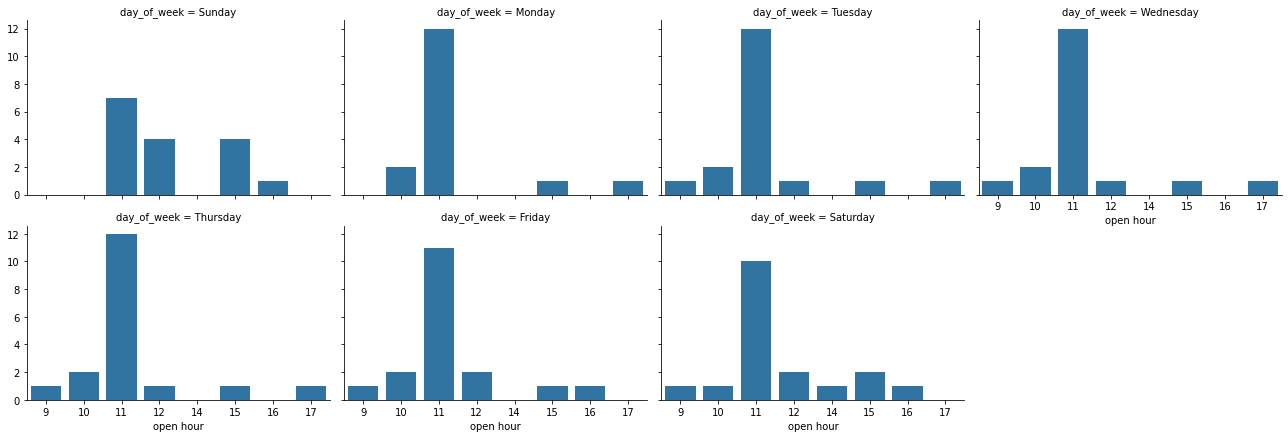

In [23]:
melt_df = piv.unstack().reset_index()
melt_df = melt_df.rename(columns={0: 'count'})

g = sns.FacetGrid(
    melt_df, col="day_of_week", height=3, aspect=1.5, col_wrap=4,
    col_order=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
)
g.map_dataframe(sns.barplot, x="open", y="count")
g.set_axis_labels("open hour")

- 요일별 close 시간 파악

In [24]:
close_hour_count = output.groupby(["day_of_week", 'close'], as_index=False)['name'].count()
close_hour_count = close_hour_count.rename(columns={'name': 'count'})

piv = close_hour_count.pivot(index='close', columns='day_of_week', values='count')
piv = piv.fillna(0)
piv[['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']]

day_of_week,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
close,,,,,,,
0,3.0,3.0,3.0,3.0,3.0,5.0,4.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,2.0,2.0
3,0.0,0.0,0.0,0.0,0.0,1.0,1.0
15,0.0,0.0,0.0,0.0,0.0,0.0,1.0
16,0.0,0.0,1.0,1.0,1.0,1.0,0.0
17,1.0,1.0,1.0,1.0,0.0,0.0,1.0
18,0.0,0.0,0.0,0.0,1.0,1.0,0.0
21,2.0,0.0,1.0,1.0,1.0,1.0,1.0


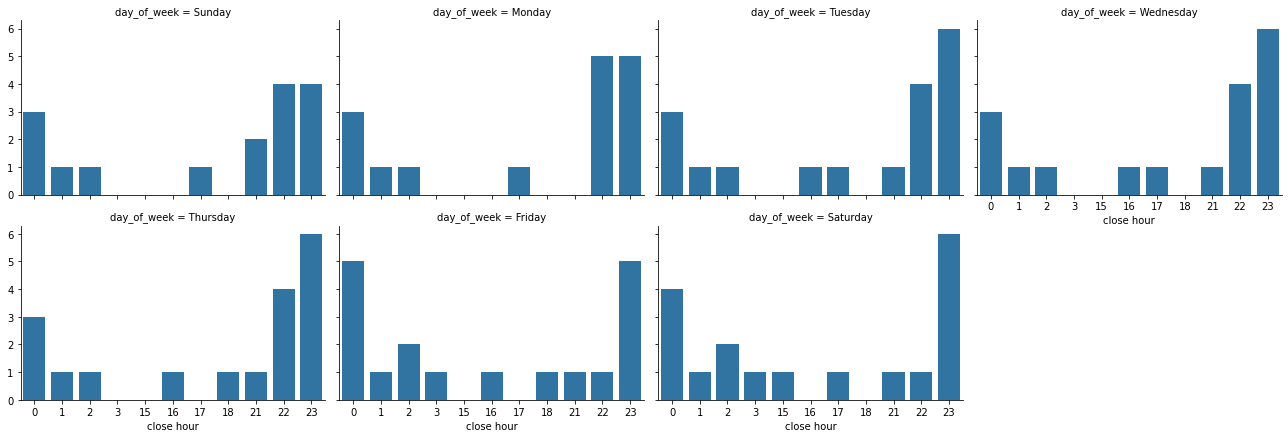

In [25]:
melt_df = piv.unstack().reset_index()
melt_df = melt_df.rename(columns={0: 'count'})

g = sns.FacetGrid(
    melt_df, col="day_of_week", height=3, aspect=1.5, col_wrap=4,
    col_order=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
)
g.map_dataframe(sns.barplot, x="close", y="count")
g.set_axis_labels("close hour")